# Day 6: Visualization & Communication
## Notebook 2: Beautiful and Informative Plots with Seaborn

**Introduction to Scientific Programming**  
CNC-UC | 2025

This notebook covers:
- Understand when to use Seaborn vs Matplotlib
- Master common Seaborn plot types
- Create distribution, relationship, and categorical plots
- Use FacetGrid and pairplot for multi-dimensional data
- Apply themes and colorblind-safe color palettes

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed
np.random.seed(42)

# Set Seaborn style
sns.set_theme(style='whitegrid', palette='colorblind')
print("✓ Seaborn configured with colorblind-safe palette")

✓ Seaborn configured with colorblind-safe palette


## Part 1: Why Seaborn?

**Seaborn advantages:**
- High-level interface with better defaults
- Seamless integration with pandas DataFrames
- Built-in themes and color palettes
- Statistical functions (confidence intervals, regression fits)
- Less verbose code for common plots

In [2]:
# Generate sample neuroscience data
n_subjects = 50

data = pd.DataFrame({
    'subject_id': range(n_subjects),
    'control_rt': np.random.normal(450, 50, n_subjects),
    'treatment_rt': np.random.normal(400, 45, n_subjects),
    'age': np.random.randint(20, 60, n_subjects),
    'group': np.random.choice(['Young', 'Old'], n_subjects),
    'sex': np.random.choice(['Male', 'Female'], n_subjects)
})

# Add response accuracy
data['accuracy'] = 0.7 + 0.2 * np.random.random(n_subjects)
data['accuracy'] = data['accuracy'].clip(0, 1)

print("Sample data (reaction time study):")
print(data.head())
print(f"\nShape: {data.shape}")

Sample data (reaction time study):
   subject_id  control_rt  treatment_rt  age  group     sex  accuracy
0           0  474.835708    414.583779   28  Young  Female  0.801763
1           1  443.086785    382.671297   56  Young  Female  0.827267
2           2  482.384427    369.538510   52    Old  Female  0.750092
3           3  526.151493    427.525433   43    Old  Female  0.817974
4           4  438.292331    446.394979   34  Young    Male  0.895779

Shape: (50, 7)


## Part 2: Distribution Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


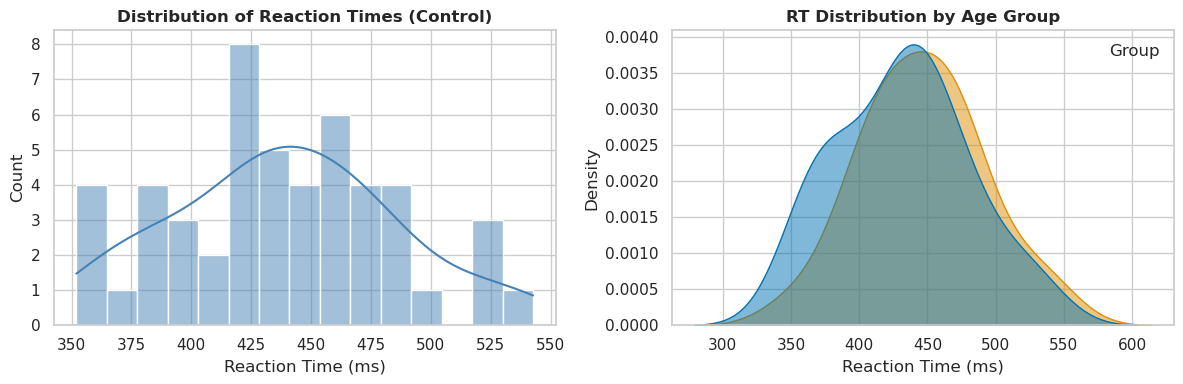

In [6]:
# Histogram with KDE
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(data=data, x='control_rt', bins=15, kde=True, ax=axes[0], color='steelblue')
axes[0].set_xlabel('Reaction Time (ms)')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Reaction Times (Control)', fontweight='bold')

# KDE plot comparing groups
sns.kdeplot(data=data, x='control_rt', hue='group', fill=True, alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Reaction Time (ms)')
axes[1].set_ylabel('Density')
axes[1].set_title('RT Distribution by Age Group', fontweight='bold')
axes[1].legend(title='Group', frameon=False)

plt.tight_layout()
plt.show()

## Part 3: Categorical Plots (Comparison)

In [7]:
# Prepare data in long format for comparison
data_long = pd.melt(data, 
                     id_vars=['subject_id', 'group', 'sex'],
                     value_vars=['control_rt', 'treatment_rt'],
                     var_name='condition',
                     value_name='reaction_time')

data_long['condition'] = data_long['condition'].str.replace('_rt', '').str.capitalize()

print("Data in long format:")
print(data_long.head())

Data in long format:
   subject_id  group     sex condition  reaction_time
0           0  Young  Female   Control     474.835708
1           1  Young  Female   Control     443.086785
2           2    Old  Female   Control     482.384427
3           3    Old  Female   Control     526.151493
4           4  Young    Male   Control     438.292331


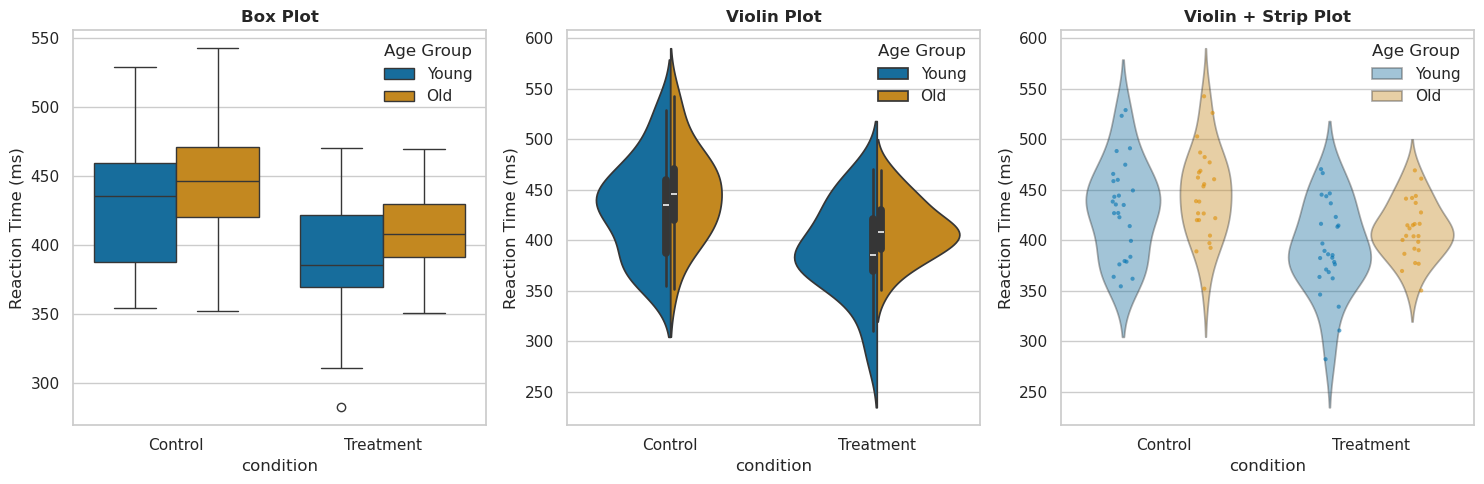

In [8]:
# Box plot, Violin plot, and Strip plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot
sns.boxplot(data=data_long, x='condition', y='reaction_time', hue='group', ax=axes[0])
axes[0].set_ylabel('Reaction Time (ms)')
axes[0].set_title('Box Plot', fontweight='bold')
axes[0].legend(title='Age Group', frameon=False)

# Violin plot
sns.violinplot(data=data_long, x='condition', y='reaction_time', hue='group', 
               split=True, ax=axes[1])
axes[1].set_ylabel('Reaction Time (ms)')
axes[1].set_title('Violin Plot', fontweight='bold')
axes[1].legend(title='Age Group', frameon=False)

# Violin + Strip (show individual points)
sns.violinplot(data=data_long, x='condition', y='reaction_time', hue='group',
               split=False, inner=None, alpha=0.4, ax=axes[2])
sns.stripplot(data=data_long, x='condition', y='reaction_time', hue='group',
              dodge=True, size=3, alpha=0.6, ax=axes[2])
axes[2].set_ylabel('Reaction Time (ms)')
axes[2].set_title('Violin + Strip Plot', fontweight='bold')
handles, labels = axes[2].get_legend_handles_labels()
axes[2].legend(handles[:2], labels[:2], title='Age Group', frameon=False)

plt.tight_layout()
plt.show()

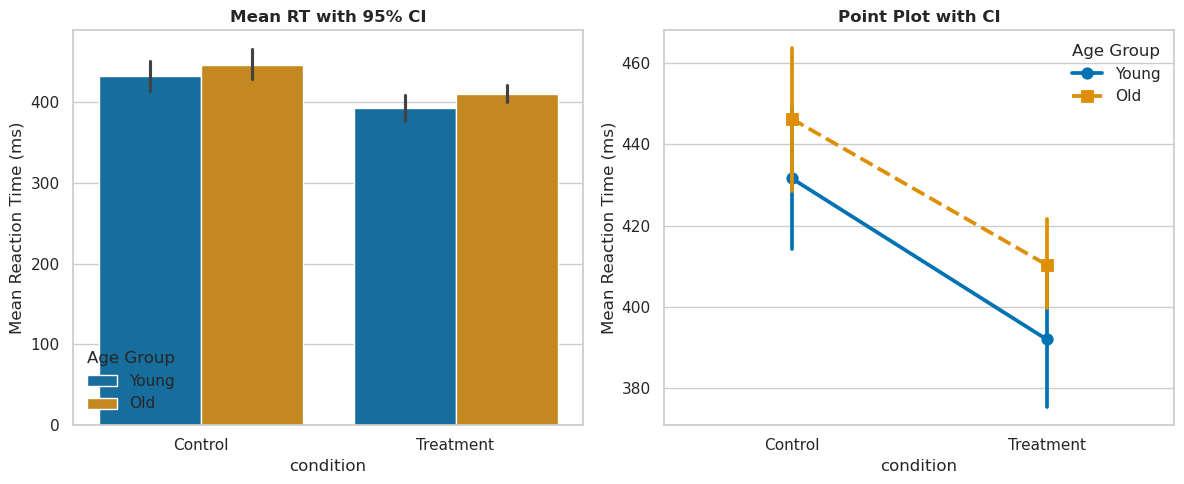

In [9]:
# Bar plot with error bars (showing means and confidence intervals)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot with CI
sns.barplot(data=data_long, x='condition', y='reaction_time', hue='group', 
            errorbar='ci', ax=axes[0])
axes[0].set_ylabel('Mean Reaction Time (ms)')
axes[0].set_title('Mean RT with 95% CI', fontweight='bold')
axes[0].legend(title='Age Group', frameon=False)

# Point plot (shows mean and CI with lines connecting conditions)
sns.pointplot(data=data_long, x='condition', y='reaction_time', hue='group',
              errorbar='ci', ax=axes[1], markers=['o', 's'], linestyles=['-', '--'])
axes[1].set_ylabel('Mean Reaction Time (ms)')
axes[1].set_title('Point Plot with CI', fontweight='bold')
axes[1].legend(title='Age Group', frameon=False)

plt.tight_layout()
plt.show()

## Part 4: Relationship Plots

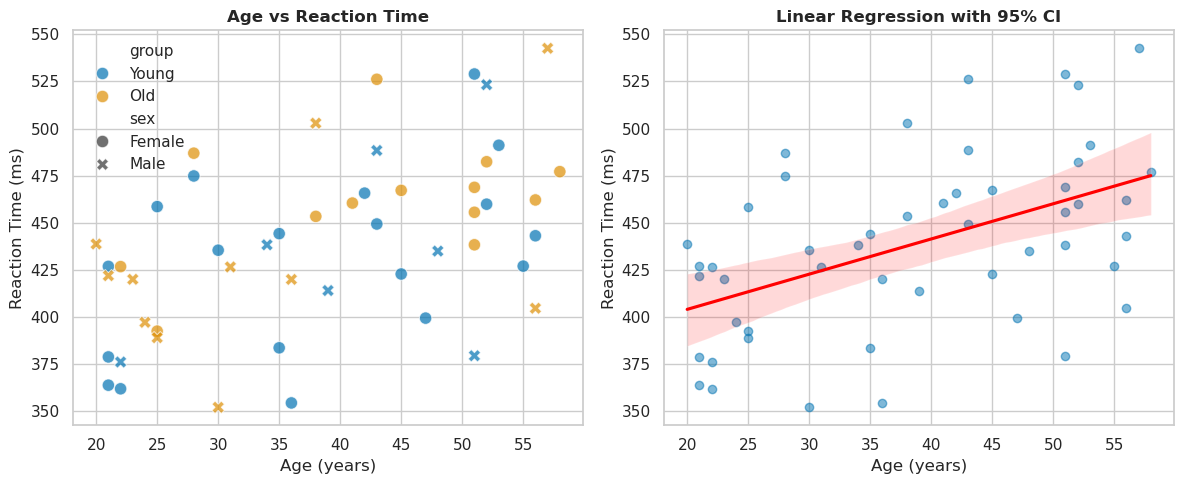

In [10]:
# Scatter plot with regression
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Simple scatter
sns.scatterplot(data=data, x='age', y='control_rt', hue='group', 
                style='sex', s=80, alpha=0.7, ax=axes[0])
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Reaction Time (ms)')
axes[0].set_title('Age vs Reaction Time', fontweight='bold')
axes[0].legend(frameon=False)

# Regression plot with confidence interval
sns.regplot(data=data, x='age', y='control_rt', 
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'},
            ax=axes[1])
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('Reaction Time (ms)')
axes[1].set_title('Linear Regression with 95% CI', fontweight='bold')

plt.tight_layout()
plt.show()

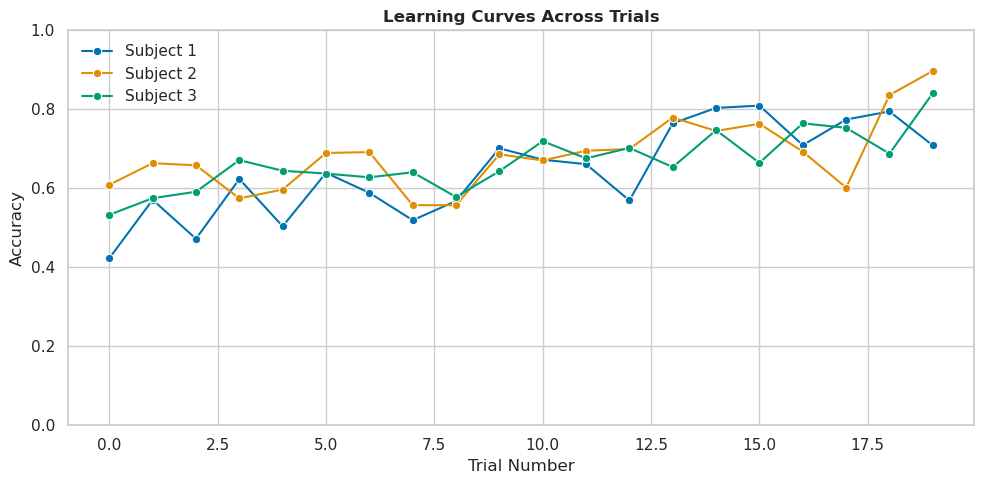

In [11]:
# Line plot showing trends
# Generate time series data
time_data = pd.DataFrame({
    'trial': np.tile(range(20), 3),
    'accuracy': np.concatenate([
        0.5 + 0.3 * np.arange(20) / 20 + np.random.normal(0, 0.05, 20),
        0.6 + 0.2 * np.arange(20) / 20 + np.random.normal(0, 0.05, 20),
        0.55 + 0.25 * np.arange(20) / 20 + np.random.normal(0, 0.05, 20)
    ]),
    'subject': np.repeat(['Subject 1', 'Subject 2', 'Subject 3'], 20)
})

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=time_data, x='trial', y='accuracy', hue='subject', 
             marker='o', ax=ax)
ax.set_xlabel('Trial Number')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curves Across Trials', fontweight='bold')
ax.legend(title='', frameon=False)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Part 5: Matrix Plots (Correlation and Heatmaps)

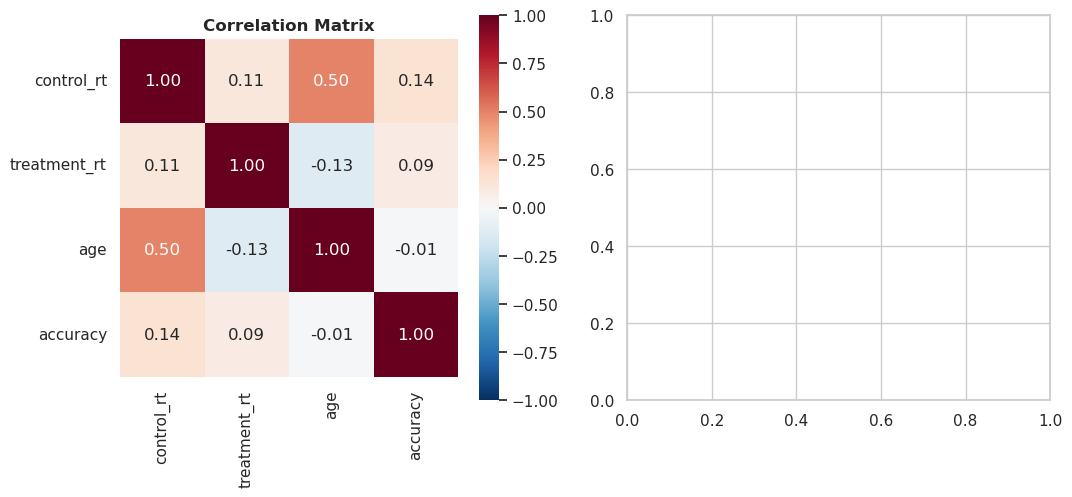

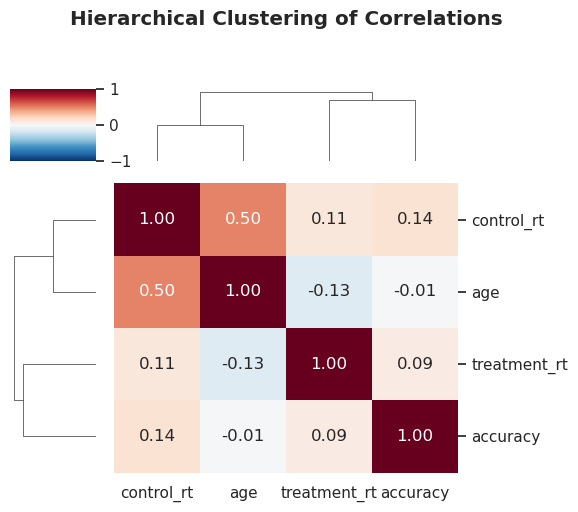

In [12]:
# Correlation heatmap
numeric_cols = ['control_rt', 'treatment_rt', 'age', 'accuracy']
correlation_matrix = data[numeric_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Default heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, vmin=-1, vmax=1, square=True, ax=axes[0])
axes[0].set_title('Correlation Matrix', fontweight='bold')

# Clustered heatmap (hierarchical clustering)
sns.clustermap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r',
               center=0, vmin=-1, vmax=1, figsize=(6, 5))
plt.suptitle('Hierarchical Clustering of Correlations', y=1.02, fontweight='bold')

plt.tight_layout()
plt.show()

## Part 6: Multi-Dimensional Visualization with Pairplot

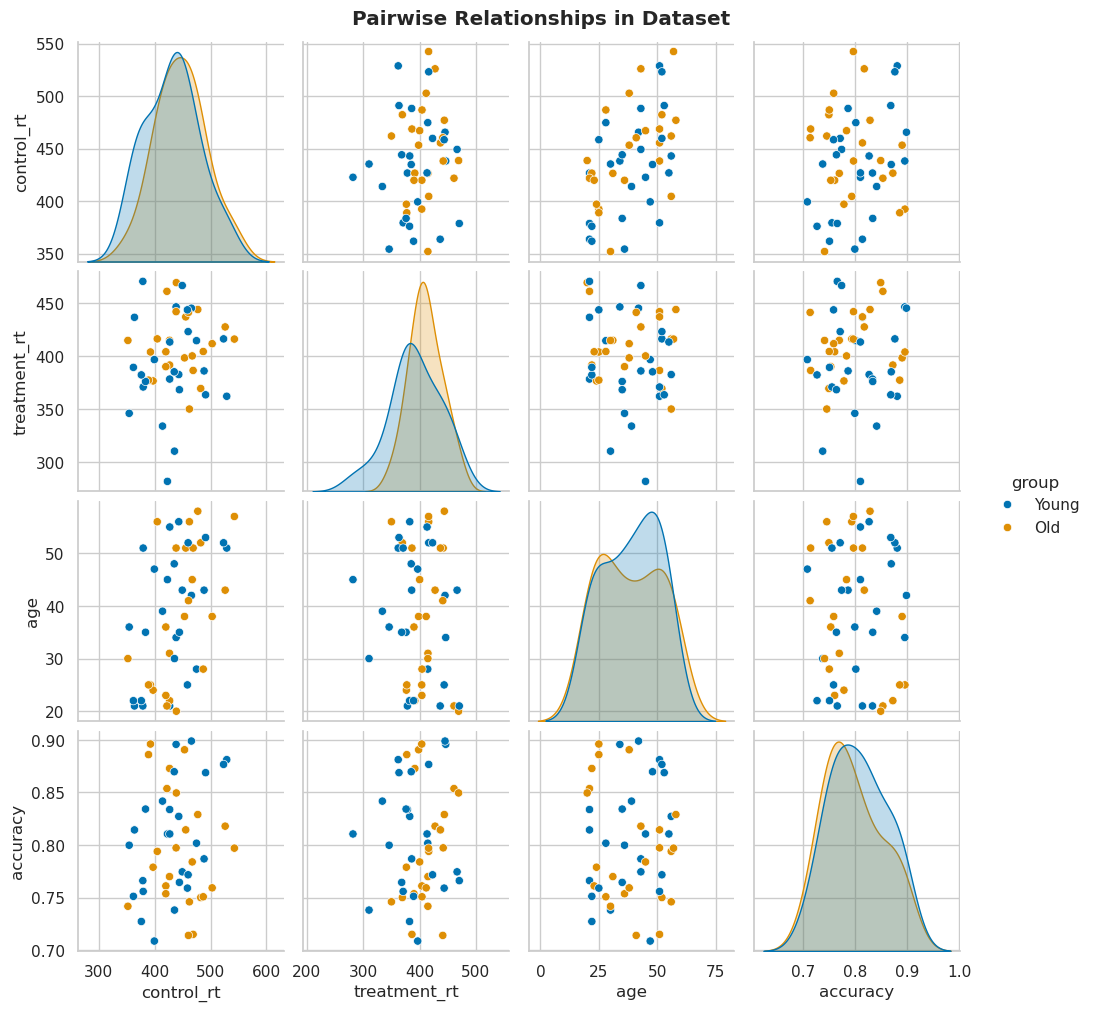


📊 Pairplot shows:
  - Diagonal: Distribution of each variable (KDE)
  - Off-diagonal: Scatter plots of variable pairs
  - Color: Separated by 'group'


In [13]:
# Pairplot: all pairwise relationships
g = sns.pairplot(data[['control_rt', 'treatment_rt', 'age', 'accuracy', 'group']], 
                 hue='group', diag_kind='kde', corner=False, height=2.5)
g.fig.suptitle('Pairwise Relationships in Dataset', y=1.01, fontweight='bold')
plt.show()

print("\n📊 Pairplot shows:")
print("  - Diagonal: Distribution of each variable (KDE)")
print("  - Off-diagonal: Scatter plots of variable pairs")
print("  - Color: Separated by 'group'")

## Part 7: FacetGrid for Conditional Plots

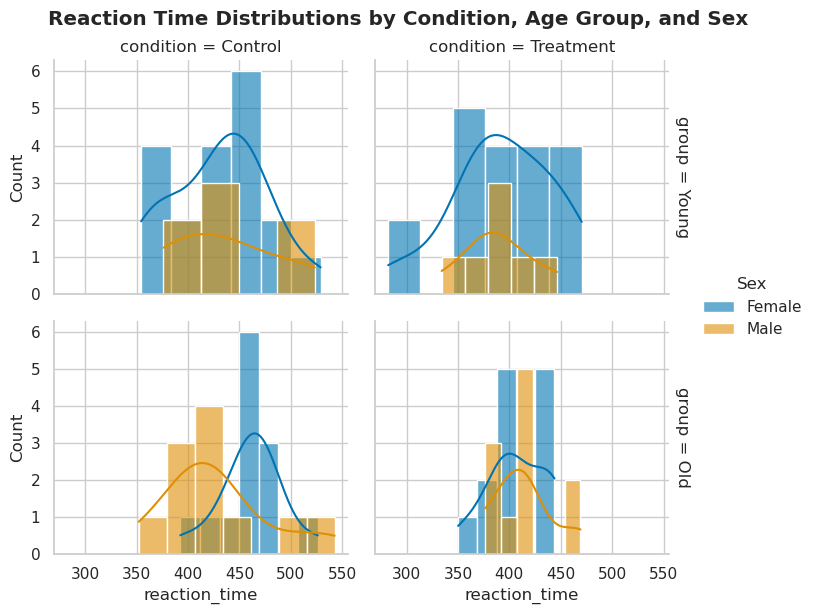

In [14]:
# Create FacetGrid: separate plots by categorical variables
g = sns.FacetGrid(data_long, col='condition', row='group', hue='sex', 
                  height=3, aspect=1.2, margin_titles=True)
g.map(sns.histplot, 'reaction_time', kde=True, alpha=0.6)
g.add_legend(title='Sex')
g.fig.suptitle('Reaction Time Distributions by Condition, Age Group, and Sex', 
               y=1.02, fontweight='bold')
plt.show()

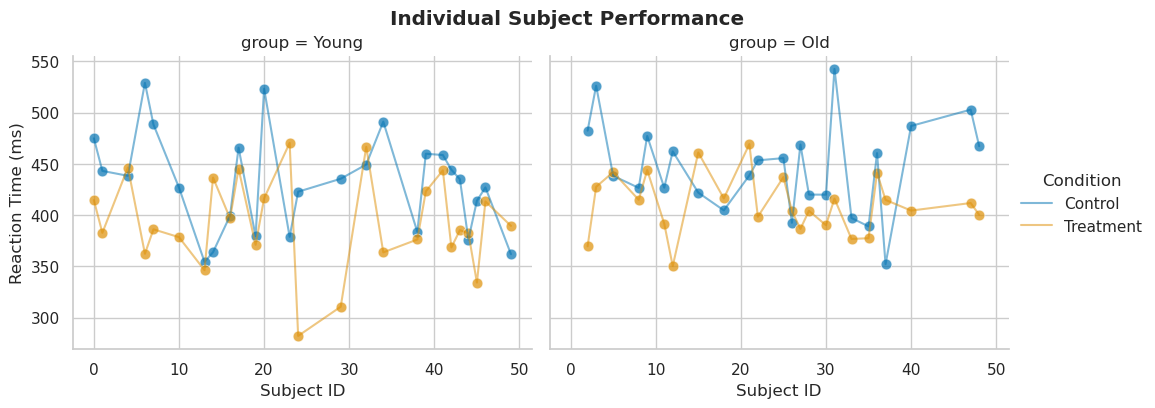

In [15]:
# More complex FacetGrid example
g = sns.FacetGrid(data_long, col='group', hue='condition', height=4, aspect=1.3)
g.map(sns.scatterplot, 'subject_id', 'reaction_time', alpha=0.7, s=60)
g.map(sns.lineplot, 'subject_id', 'reaction_time', alpha=0.5)
g.add_legend(title='Condition')
g.set_axis_labels('Subject ID', 'Reaction Time (ms)')
g.fig.suptitle('Individual Subject Performance', y=1.02, fontweight='bold')
plt.show()

## Part 8: Themes and Color Palettes

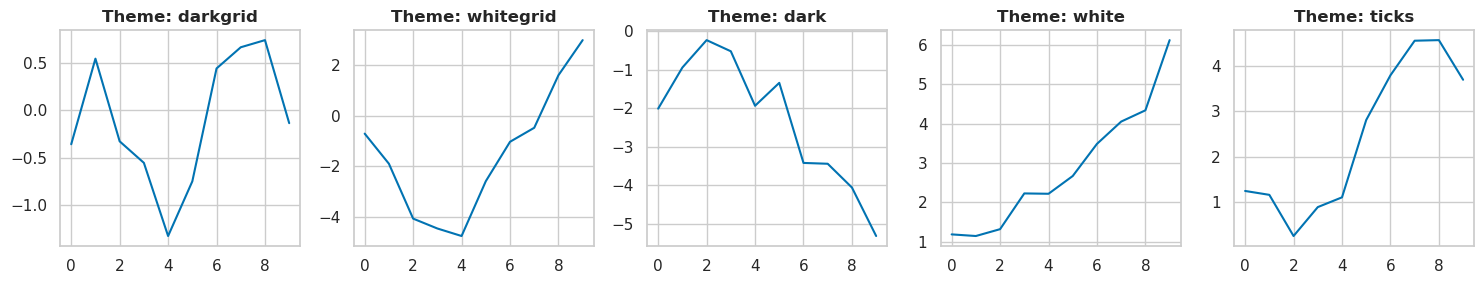

In [19]:
# Available Seaborn themes
themes = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

fig, axes = plt.subplots(1, len(themes), figsize=(15, 3))

for i, theme in enumerate(themes):
    sns.set_theme(style=theme)
    sns.lineplot(x=range(10), y=np.random.randn(10).cumsum(), ax=axes[i])
    axes[i].set_title(f'Theme: {theme}', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Reset to default
sns.set_theme(style='whitegrid', palette='colorblind')

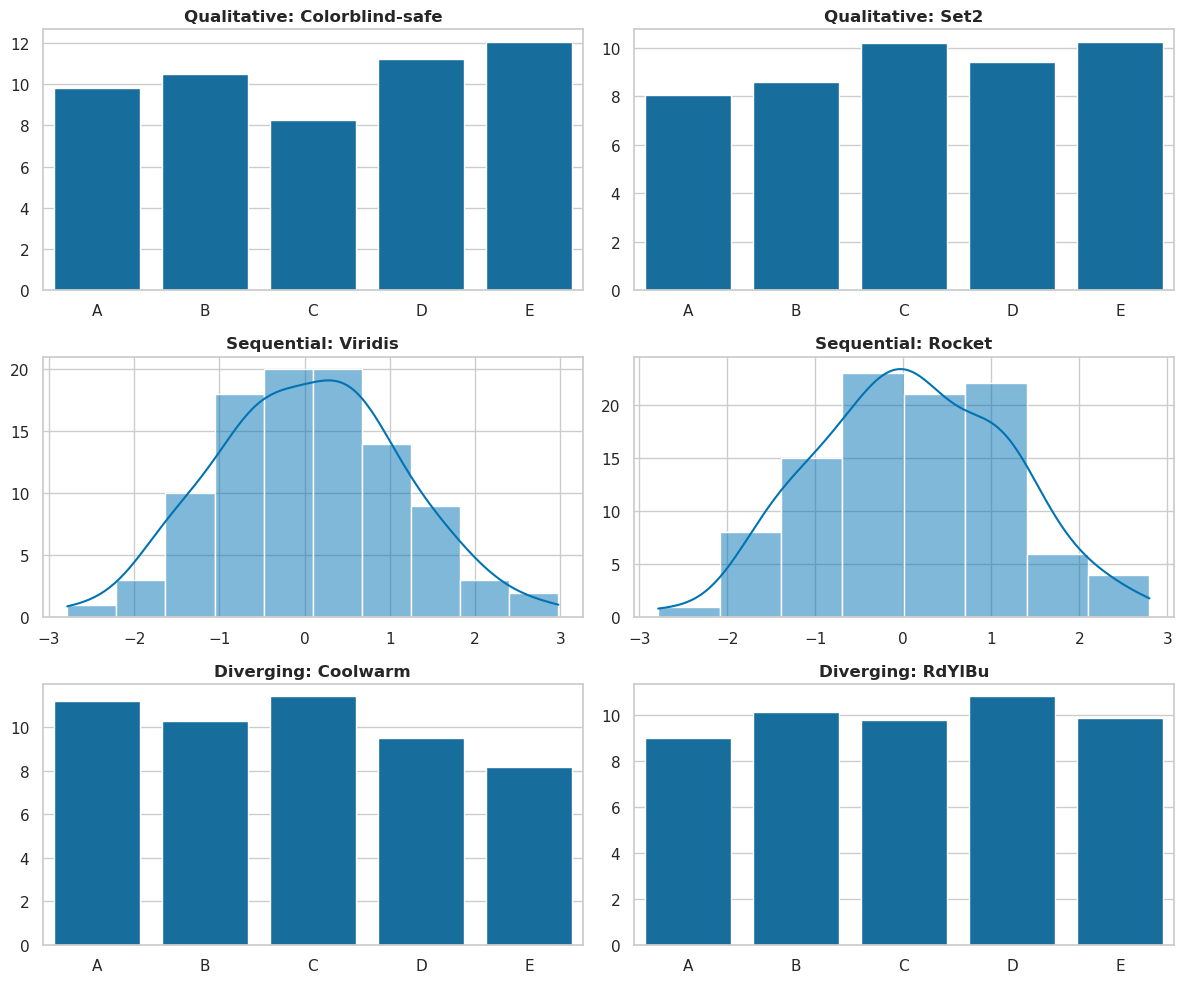


✓ Always use colorblind-safe palettes for publications!


In [20]:
# Color palettes comparison
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

palettes = [
    ('colorblind', 'Qualitative: Colorblind-safe'),
    ('Set2', 'Qualitative: Set2'),
    ('viridis', 'Sequential: Viridis'),
    ('rocket', 'Sequential: Rocket'),
    ('coolwarm', 'Diverging: Coolwarm'),
    ('RdYlBu', 'Diverging: RdYlBu')
]

for idx, (palette_name, title) in enumerate(palettes):
    if palette_name in ['viridis', 'rocket']:
        # Sequential palettes for continuous data
        data_plot = np.random.randn(100)
        sns.histplot(data_plot, kde=True, ax=axes[idx], palette=palette_name)
    else:
        # Categorical palettes
        sns.set_palette(palette_name)
        categories = ['A', 'B', 'C', 'D', 'E']
        values = np.random.randn(5) + 10
        sns.barplot(x=categories, y=values, ax=axes[idx])
    
    axes[idx].set_title(title, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

# Reset to colorblind palette
sns.set_palette('colorblind')
print("\n✓ Always use colorblind-safe palettes for publications!")

## Part 9: Combining Seaborn with Matplotlib for Publication Figures

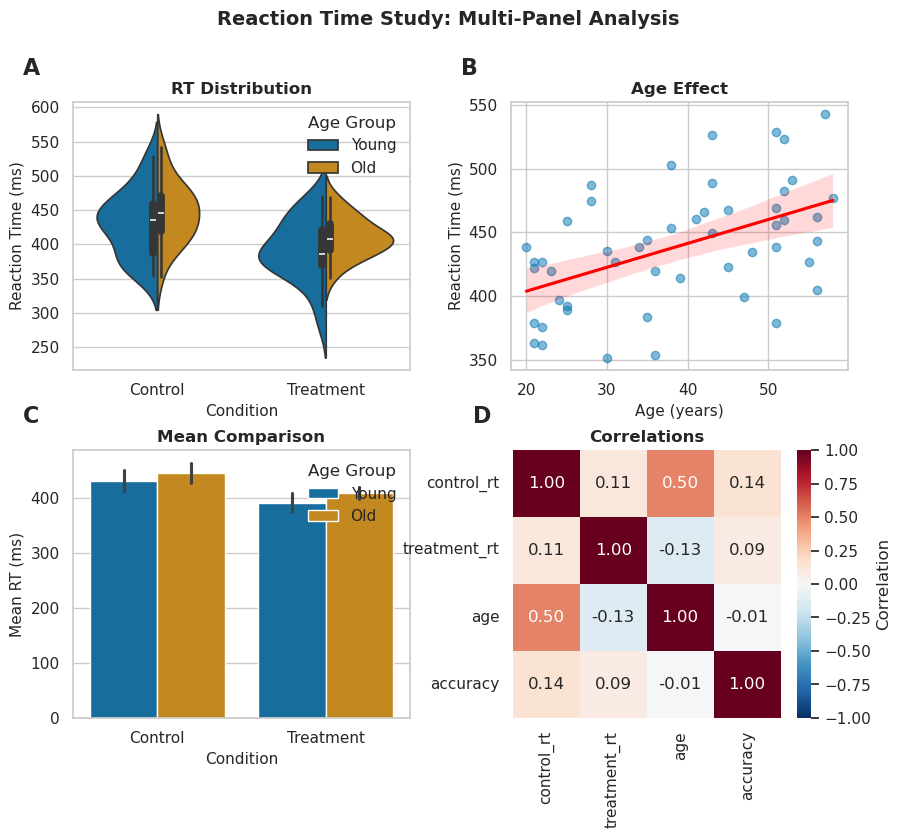


✓ Publication-ready multi-panel figure combining Seaborn and Matplotlib


In [21]:
# Create a publication-ready multi-panel figure
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Panel A: Violin plot
ax1 = fig.add_subplot(gs[0, 0])
sns.violinplot(data=data_long, x='condition', y='reaction_time', hue='group',
               split=True, ax=ax1)
ax1.set_ylabel('Reaction Time (ms)', fontsize=11)
ax1.set_xlabel('Condition', fontsize=11)
ax1.set_title('RT Distribution', fontweight='bold')
ax1.legend(title='Age Group', frameon=False, loc='upper right')
ax1.text(-0.15, 1.1, 'A', transform=ax1.transAxes, 
         fontsize=16, fontweight='bold')

# Panel B: Regression plot
ax2 = fig.add_subplot(gs[0, 1])
sns.regplot(data=data, x='age', y='control_rt', ax=ax2,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
ax2.set_xlabel('Age (years)', fontsize=11)
ax2.set_ylabel('Reaction Time (ms)', fontsize=11)
ax2.set_title('Age Effect', fontweight='bold')
ax2.text(-0.15, 1.1, 'B', transform=ax2.transAxes, 
         fontsize=16, fontweight='bold')

# Panel C: Bar plot with CI
ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(data=data_long, x='condition', y='reaction_time', hue='group',
            errorbar='ci', ax=ax3)
ax3.set_ylabel('Mean RT (ms)', fontsize=11)
ax3.set_xlabel('Condition', fontsize=11)
ax3.set_title('Mean Comparison', fontweight='bold')
ax3.legend(title='Age Group', frameon=False, loc='upper right')
ax3.text(-0.15, 1.1, 'C', transform=ax3.transAxes, 
         fontsize=16, fontweight='bold')

# Panel D: Correlation heatmap
ax4 = fig.add_subplot(gs[1, 1])
correlation = data[['control_rt', 'treatment_rt', 'age', 'accuracy']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, square=True, ax=ax4,
            cbar_kws={'label': 'Correlation'})
ax4.set_title('Correlations', fontweight='bold')
ax4.text(-0.15, 1.1, 'D', transform=ax4.transAxes, 
         fontsize=16, fontweight='bold')

plt.suptitle('Reaction Time Study: Multi-Panel Analysis', 
             fontsize=14, fontweight='bold', y=0.995)
plt.show()

print("\n✓ Publication-ready multi-panel figure combining Seaborn and Matplotlib")

## Summary

### Key Takeaways:

1. **Seaborn advantages**: Better defaults, pandas integration, statistical functions
2. **Plot types**:
   - Distribution: `histplot`, `kdeplot`, `violinplot`, `boxplot`
   - Categorical: `barplot`, `pointplot`, `stripplot`, `swarmplot`
   - Relationship: `scatterplot`, `regplot`, `lineplot`
   - Matrix: `heatmap`, `clustermap`
   - Multi-dimensional: `pairplot`, `FacetGrid`
3. **Themes**: Use `sns.set_theme(style='whitegrid')` for consistent styling
4. **Color palettes**: Always use `'colorblind'` for accessibility
5. **Integration**: Combine Seaborn plots with Matplotlib OO interface for complex figures

### When to Use Seaborn:
- ✓ Quick exploratory data analysis
- ✓ Statistical comparisons with error bars/CI
- ✓ Multi-dimensional data visualization
- ✓ When working with pandas DataFrames

### When to Use Matplotlib:
- ✓ Precise control over every element
- ✓ Custom complex layouts
- ✓ Non-standard plot types